In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
boston_input = pd.read_csv('boston.csv')

# Data Exploration

In [22]:
print('\nSnapshot of the dataset (first 5 and last 5 rows):')
pd.concat([boston_input.head(),boston_input.tail()])


Snapshot of the dataset (first 5 and last 5 rows):


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [23]:
print('\nDescription of the DataFrame Column types')
print(boston_input.info())


Description of the DataFrame Column types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [24]:
boston = boston_input.drop('neighborhood', 1)
print('\nDescription of the DataFrame Column types without Neighborhood')
print(boston.info())


Description of the DataFrame Column types without Neighborhood
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [25]:
print('\nBasic statistics of our dataframe')
boston.describe()


Basic statistics of our dataframe


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000



Correlation table of our dataset


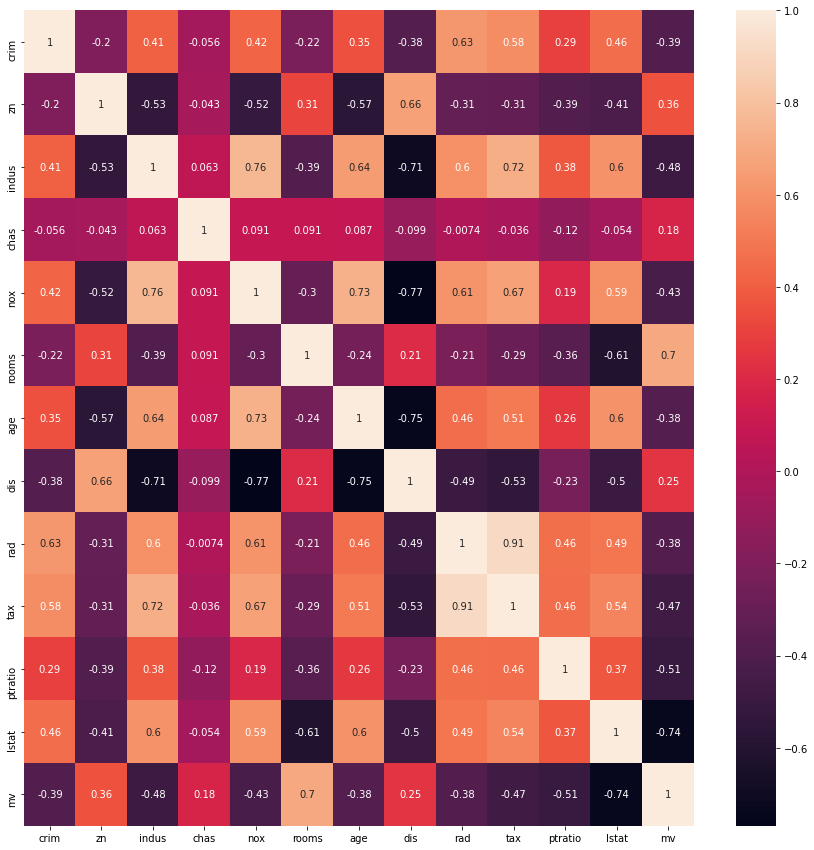

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
print('\nCorrelation table of our dataset')
sns.heatmap(boston.corr(), annot=True)
plt.rcParams['figure.figsize'] = [12, 12]

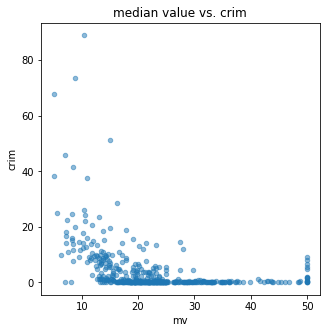

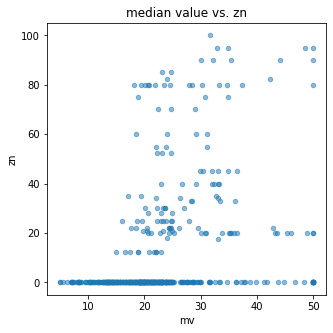

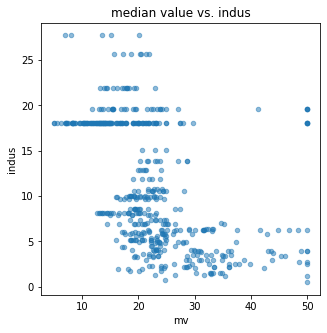

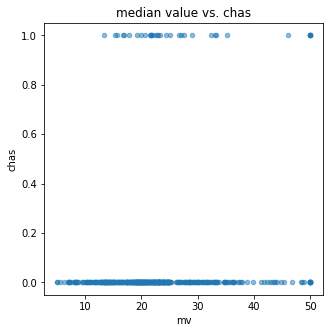

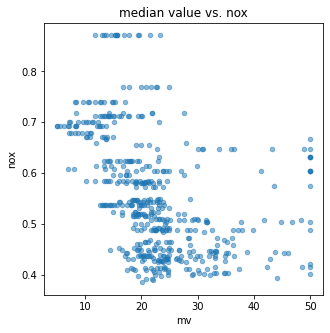

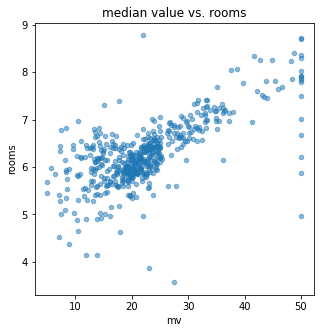

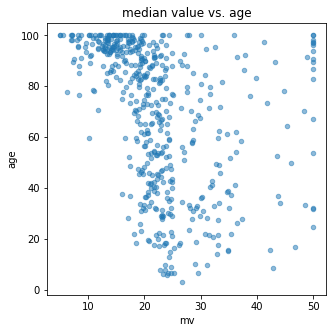

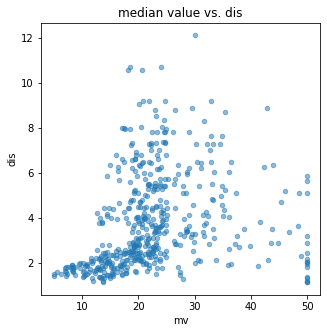

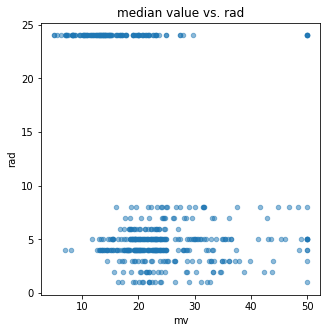

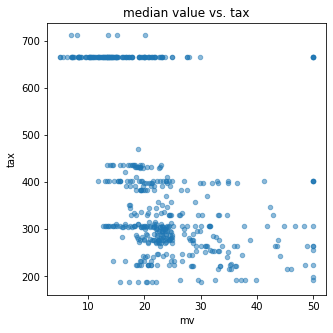

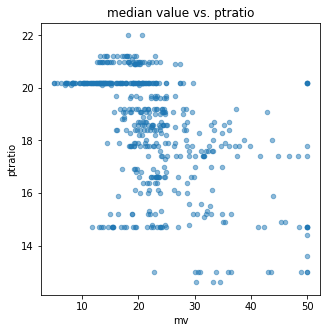

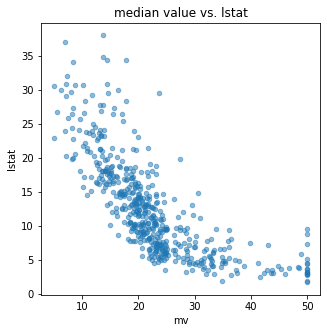

In [29]:
for col in boston.columns:
    if col == 'mv':
        continue
    else:
        boston.plot(kind = 'scatter', x='mv',y=col, alpha=0.5)
        plt.title('median value vs. ' + col)
        plt.rcParams['figure.figsize'] = [5, 5]

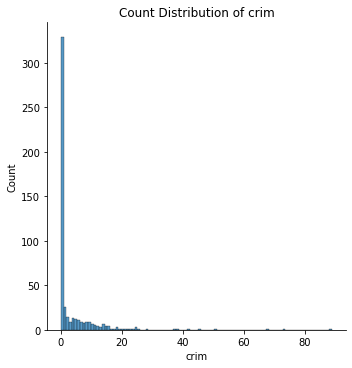

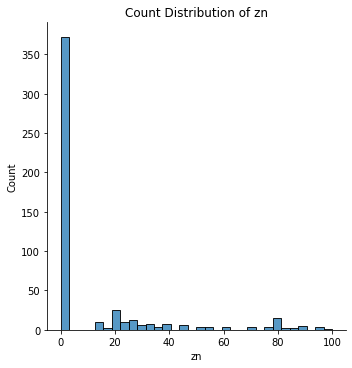

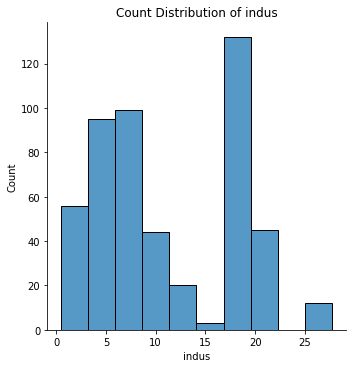

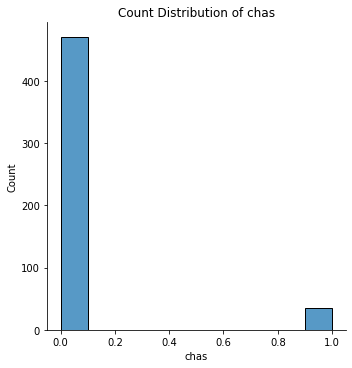

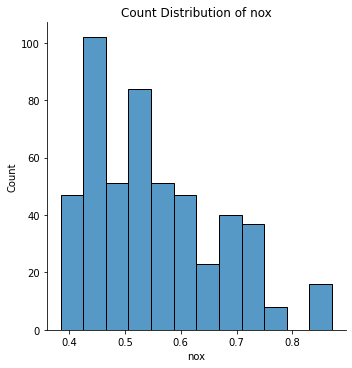

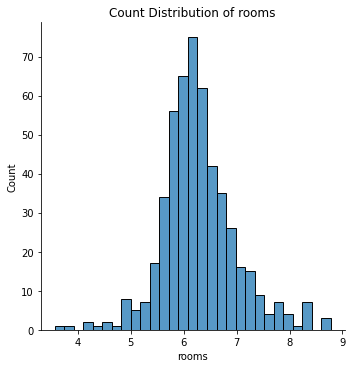

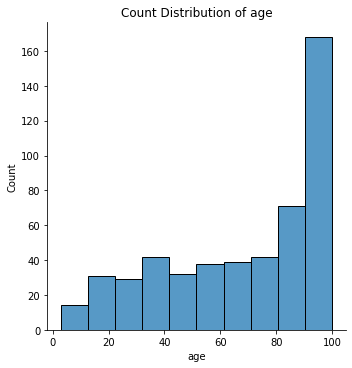

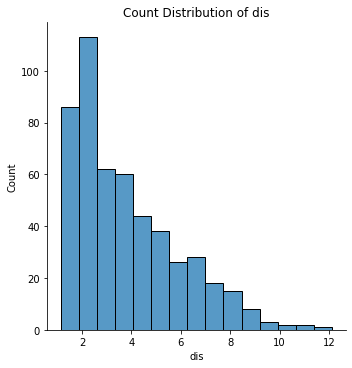

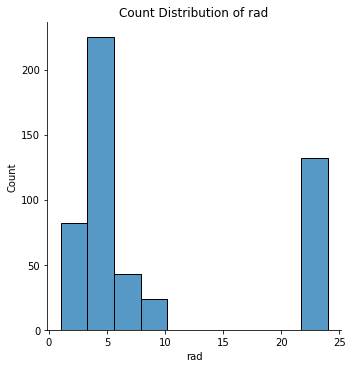

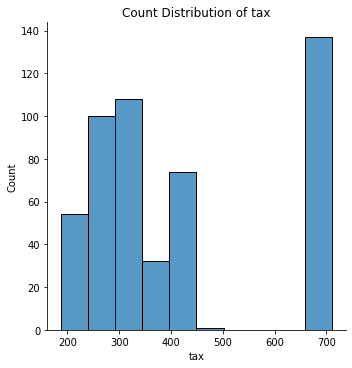

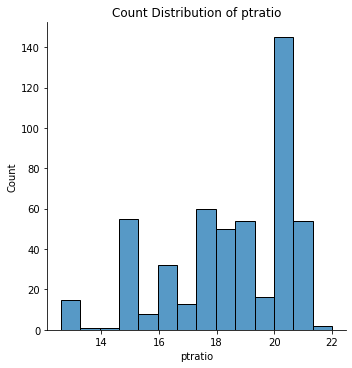

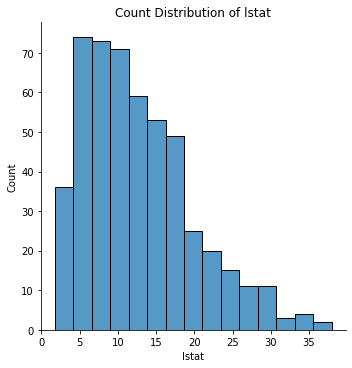

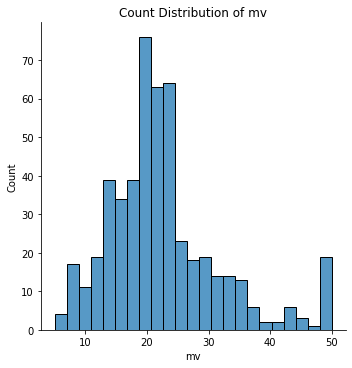

In [30]:
for col in boston.columns:
    sns.displot(boston[col])
    plt.title('Count Distribution of ' + col)

# Data Preparation

In [10]:
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [11]:
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [13]:
print(scaler.mean_)
print(scaler.scale_)

[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [14]:
model_data = scaler.fit_transform(prelim_model_data)
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [15]:
model_data_df = pd.DataFrame(model_data)
model_data_df.columns = ['mv','crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
model_data_df

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
0,0.160376,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.101258,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,1.326830,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,1.185112,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,1.490352,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147
502,-0.210273,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850
503,0.149475,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048
504,-0.057653,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302


# Creating Regression Models

In [16]:
RANDOM_SEED = 42
SET_FIT_INTERCEPT = True
regressionModels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
          'ElasticNet Regression']
regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
               Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
               Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
               ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False,random_state = RANDOM_SEED)]


In [17]:
#USING BASIC TEST_TRAIN_SPLIT METHOD
X_train, X_test, y_train, y_test = train_test_split(model_data_df[['crim', 'zn','indus','chas','nox','rooms',
                                                                   'age','dis','rad','tax','ptratio','lstat']], 
                                                    model_data_df.mv, test_size=0.33, random_state=RANDOM_SEED)

In [21]:
for name, model in zip(regressionModels, regressors):
        print('\nModel:', name)
        model.fit(X_train, y_train)
        y_test_predict = model.predict(X_test)
        print('R^2:',r2_score(y_test, y_test_predict))
        rmse = sqrt(mean_squared_error(y_test, y_test_predict))
        print('RMSE:', rmse)


Model: Linear Regression
R^2: 0.729526862679688
RMSE: 0.4943093021590174

Model: Ridge Regression
R^2: 0.7290446535206427
RMSE: 0.49474974206826744

Model: Lasso Regression
R^2: 0.6524683867950927
RMSE: 0.560317094201865

Model: ElasticNet Regression
R^2: 0.6698222469437405
RMSE: 0.5461483398744141


In [19]:
#USING KFold METHOD (CROSS VALIDATION DESIGN)
from sklearn.model_selection import KFold
def getCV(folds):
    kf = KFold(n_splits = folds, shuffle=True, random_state = RANDOM_SEED)
    cross_val_results = np.zeros((folds, len(regressionModels)))
    index_for_fold = 0  # fold count initialized 
    for train_index, test_index in kf.split(model_data):
        print('\nFold:', index_for_fold) 
        X_train = model_data[train_index, 1:model_data.shape[1]]
        X_test = model_data[test_index, 1:model_data.shape[1]]
        y_train = model_data[train_index, 0]
        y_test = model_data[test_index, 0]   
        index_for_method = 0  # initialize
        for name, reg_model in zip(regressionModels, regressors):
            print('\nRegression model evaluation for:', name)
            reg_model.fit(X_train, y_train)  # fit on the train set for this fold

            # evaluate on the test set for this fold
            y_test_predict = reg_model.predict(X_test)
            print('Coef of determination (R^2):',r2_score(y_test, y_test_predict))
            rmse = sqrt(mean_squared_error(y_test, y_test_predict))
            print('RMSE:', rmse)
            cross_val_results[index_for_fold, index_for_method] = rmse
            index_for_method += 1

        index_for_fold += 1
    cv_results_df = pd.DataFrame(cross_val_results)
    cv_results_df.columns = regressionModels

    print('\n----------------------------------------------')
    print('Average results from ', folds, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
    print(cv_results_df.mean()) 


In [20]:
getCV(25)


Fold: 0

Regression model evaluation for: Linear Regression
Coef of determination (R^2): 0.7672060570565274
RMSE: 0.4600805318222082

Regression model evaluation for: Ridge Regression
Coef of determination (R^2): 0.7681740384599867
RMSE: 0.4591230040821393

Regression model evaluation for: Lasso Regression
Coef of determination (R^2): 0.7822453176356529
RMSE: 0.4449710634825543

Regression model evaluation for: ElasticNet Regression
Coef of determination (R^2): 0.7802084109789074
RMSE: 0.4470473789106084

Fold: 1

Regression model evaluation for: Linear Regression
Coef of determination (R^2): 0.6204487947590773
RMSE: 0.3593485461498203

Regression model evaluation for: Ridge Regression
Coef of determination (R^2): 0.6229382439503864
RMSE: 0.35816813671222064

Regression model evaluation for: Lasso Regression
Coef of determination (R^2): 0.5464066649168704
RMSE: 0.3928384935989176

Regression model evaluation for: ElasticNet Regression
Coef of determination (R^2): 0.6137294698622047
RM

Coef of determination (R^2): 0.7889000041570838
RMSE: 0.5743134715094417

Regression model evaluation for: Ridge Regression
Coef of determination (R^2): 0.7892820450868637
RMSE: 0.5737935505774745

Regression model evaluation for: Lasso Regression
Coef of determination (R^2): 0.717331664045806
RMSE: 0.6645741925311346

Regression model evaluation for: ElasticNet Regression
Coef of determination (R^2): 0.7559764779458761
RMSE: 0.6174769306524617

Fold: 18

Regression model evaluation for: Linear Regression
Coef of determination (R^2): 0.8523466072535384
RMSE: 0.4595894376543413

Regression model evaluation for: Ridge Regression
Coef of determination (R^2): 0.8527886282097995
RMSE: 0.4589009996001785

Regression model evaluation for: Lasso Regression
Coef of determination (R^2): 0.757686007445434
RMSE: 0.5887590157036517

Regression model evaluation for: ElasticNet Regression
Coef of determination (R^2): 0.804895265741369
RMSE: 0.5283019670709804

Fold: 19

Regression model evaluation fo